# Figure 4 - SEL versus biophony

#### import statements

In [1]:
import pandas
import numpy
%matplotlib inline
from matplotlib import pyplot
from matplotlib.lines import Line2D
import seaborn
from scipy import stats

In [2]:
from matplotlib import rcParams

#### variable definitions

In [3]:
data_filepath = "/Users/jake/OneDrive/Documents/alpine soundscapes/data/dataset.csv"

#### formating

In [4]:
seaborn_blue = seaborn.color_palette()[0]
seaborn.set()

In [5]:
rcParams['font.sans-serif']

['Arial',
 'DejaVu Sans',
 'Liberation Sans',
 'Bitstream Vera Sans',
 'sans-serif']

In [6]:
rcParams['font.sans-serif'] = ['Helvetica Neue',
                               'Arial',
                               'Bitstream Vera Sans',
                               'DejaVu Sans',
                               'Lucida Grande',
                               'Verdana',
                               'Geneva',
                               'Lucid',
                               'Avant Garde',
                               'sans-serif']

#### sort data

In [7]:
data = pandas.read_csv(data_filepath)
data = data.loc[data.site<=30]

In [8]:
data = data.sort_values(by=['site', 'sound']).reset_index(drop=True)

#### compute means

In [9]:
means = data[['site', 'sel', 'biophony']].groupby('site').mean()
mins = data[['site', 'sel', 'biophony']].groupby('site').min()
maxs = data[['site', 'sel', 'biophony']].groupby('site').max()

#### plot

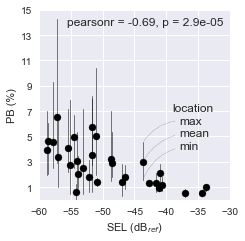

In [15]:
figure4, ax = pyplot.subplots()
figure4.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95, wspace=0, hspace=0)
figure4.set_figheight(3.30)
figure4.set_figwidth(3.30)

p1 = ax.scatter('sel', 'biophony', data=means, color='black')
xl = ax.set_xlabel('SEL (dB' + r'$_{ref}$' + ')')
yl = ax.set_ylabel('PB (%)')
lx = ax.set_xlim(-60, -30)
ly = ax.set_ylim(0, 15)

yt = ax.set_yticks(numpy.arange(1, 17, 2))

for s in means.index:
    x = means.loc[s].sel
    y1 = mins.loc[s].biophony
    y2 = maxs.loc[s].biophony
    ax.add_line(Line2D([x, x], [y1, y2], color='black', linewidth=1, alpha=0.5))

# legend
ap = dict(arrowstyle='-',
          connectionstyle='arc3,rad=0.3', linestyle=':', linewidth=0.5, color='gray')
a0 = ax.text(-39, 7, 'location')
a1 = ax.annotate('mean', (means.loc[29].sel, means.loc[29].biophony), xytext=(-38, 5), arrowprops=ap)
a2 = ax.annotate('max', (means.loc[29].sel, maxs.loc[29].biophony), xytext=(-38, 6), arrowprops=ap)
a3 = ax.annotate('min', (means.loc[29].sel, mins.loc[29].biophony), xytext=(-38, 4), arrowprops=ap)

# pearsonr
r = stats.pearsonr(x=means.sel, y=means.biophony)
a4 = ax.text(x=-31, y=14, s='pearsonr = {0:.2f}, p = {1:.1e}'.format(r[0], r[1]), ha='right', va='center')

#### save figure

In [16]:
#figure4.savefig("/Users/jake/Desktop/figure4.tiff", dpi=150)